# Practical: Building a De Bruijn Graph

In [4]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [5]:
nodes, edges = de_bruijn_ize("ACGCGTCG", 3)

In [6]:
nodes

{'AC', 'CG', 'GC', 'GT', 'TC'}

In [7]:
edges

[('AC', 'CG'),
 ('CG', 'GC'),
 ('GC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TC'),
 ('TC', 'CG')]

In [3]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

In [22]:
#import sys
#sys.path.append('/content/drive/MyDrive/Colab Notebooks')
!pip install gvmagic

  Created wheel for gvmagic: filename=gvmagic-0.5-py3-none-any.whl size=10470 sha256=48c2479154e1ef77d284264c0f8ff521612d94c4506217f4967027768257111e
  Stored in directory: /root/.cache/pip/wheels/e5/ad/b2/2ba1aaaf5b2004d96473291c80f98d4524a01c6d6e9d468172
Successfully built gvmagic


In [1]:

# might have to do this first:
# %install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py
%load_ext gvmagic

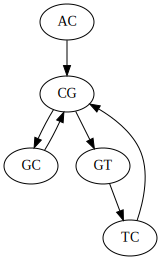

In [8]:
%dotstr visualize_de_bruijn("ACGCGTCG", 3)